In [ ]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/IMDB-Movie-Data.csv")

df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Removing spaces in Genre and Actors columns

In [ ]:
for i in range(1000):
  df['Genre'][i]=df['Genre'][i].replace(" ","")

for i in range(1000):
  df['Actors'][i]=df['Actors'][i].replace(" ","")

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"NoomiRapace,LoganMarshall-Green,MichaelFassben...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"JamesMcAvoy,AnyaTaylor-Joy,HaleyLuRichardson,J...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"MatthewMcConaughey,ReeseWitherspoon,SethMacFar...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"WillSmith,JaredLeto,MargotRobbie,ViolaDavis",2016,123,6.2,393727,325.02,40.0


Convert Genres of a movie into a numeric value using target encoding where our target is the Imdb Rating

In [ ]:
L=[]

for i in df['Genre']:
  values=i.split(',')
  for j in values:
    L.append(j)

L=list(set(L))

Avg=dict()
Sum=dict()
Count=dict()

for i in L:
  Sum[i]=0
  Count[i]=0

for i in range(1000):
  values=df['Genre'][i].split(',')
  for j in values:
    Sum[j]=Sum[j]+df['Rating'][i]
    Count[j]=Count[j]+1

for i in L:
  Avg[i]=Sum[i]/Count[i]

NewColumn=[]

for i in df['Genre']:
  values=i.split(',')
  sum=0
  for j in values:
    sum=sum+Avg[j]
  NewColumn.append(sum/len(values))

df['Genre']=NewColumn

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,6.701130,A group of intergalactic criminals are forced ...,James Gunn,"ChrisPratt,VinDiesel,BradleyCooper,ZoeSaldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,6.791887,"Following clues to the origin of mankind, a te...",Ridley Scott,"NoomiRapace,LoganMarshall-Green,MichaelFassben...",2012,124,7.0,485820,126.46,65.0
2,3,Split,6.341625,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"JamesMcAvoy,AnyaTaylor-Joy,HaleyLuRichardson,J...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,6.885491,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"MatthewMcConaughey,ReeseWitherspoon,SethMacFar...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,6.645079,A secret government agency recruits some of th...,David Ayer,"WillSmith,JaredLeto,MargotRobbie,ViolaDavis",2016,123,6.2,393727,325.02,40.0


Doing the same for Actors

In [ ]:
L=[]

for i in df['Actors']:
  values=i.split(',')
  for j in values:
    L.append(j)

L=list(set(L))

Avg=dict()
Sum=dict()
Count=dict()

for i in L:
  Sum[i]=0
  Count[i]=0

for i in range(1000):
  values=df['Actors'][i].split(',')
  for j in values:
    Sum[j]=Sum[j]+df['Rating'][i]
    Count[j]=Count[j]+1

for i in L:
  Avg[i]=Sum[i]/Count[i]

NewColumn=[]

for i in df['Actors']:
  values=i.split(',')
  sum=0
  for j in values:
    sum=sum+Avg[j]
  NewColumn.append(sum/len(values))

df['Actors']=NewColumn

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,6.701130,A group of intergalactic criminals are forced ...,James Gunn,7.204275,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,6.791887,"Following clues to the origin of mankind, a te...",Ridley Scott,6.730417,2012,124,7.0,485820,126.46,65.0
2,3,Split,6.341625,Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,7.120833,2016,117,7.3,157606,138.12,62.0
3,4,Sing,6.885491,"In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,6.942500,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,6.645079,A secret government agency recruits some of th...,David Ayer,6.980595,2016,123,6.2,393727,325.02,40.0


Doing the same for Directors

In [ ]:
L=[]

for i in df['Director']:
  values=i.split(',')
  for j in values:
    L.append(j)

L=list(set(L))

Avg=dict()
Sum=dict()
Count=dict()

for i in L:
  Sum[i]=0
  Count[i]=0

for i in range(1000):
  values=df['Director'][i].split(',')
  for j in values:
    Sum[j]=Sum[j]+df['Rating'][i]
    Count[j]=Count[j]+1

for i in L:
  Avg[i]=Sum[i]/Count[i]

NewColumn=[]

for i in df['Director']:
  values=i.split(',')
  sum=0
  for j in values:
    sum=sum+Avg[j]
  NewColumn.append(sum/len(values))

df['Director']=NewColumn

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,6.701130,A group of intergalactic criminals are forced ...,7.133333,7.204275,2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,6.791887,"Following clues to the origin of mankind, a te...",6.850000,6.730417,2012,124,7.0,485820,126.46,65.0
2,3,Split,6.341625,Three girls are kidnapped by a man with a diag...,5.533333,7.120833,2016,117,7.3,157606,138.12,62.0
3,4,Sing,6.885491,"In a city of humanoid animals, a hustling thea...",7.200000,6.942500,2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,6.645079,A secret government agency recruits some of th...,7.166667,6.980595,2016,123,6.2,393727,325.02,40.0


In [ ]:
df.dtypes

Rank                    int64
Title                  object
Genre                 float64
Description            object
Director              float64
Actors                float64
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object

Normalizing the final data

In [ ]:
for i in df.columns:
  if(df[i].dtypes=='object'):
    continue
  df[i]=df[i].astype('float64')
  Max=df[i].max()
  Min=df[i].min()
  for j in range(1000):
    df[i][j]=(df[i][j]-Min)/(Max-Min)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0.000000,Guardians of the Galaxy,0.574499,A group of intergalactic criminals are forced ...,0.758454,0.763594,0.8,0.440,0.873239,0.422474,0.355669,0.730337
1,0.001001,Prometheus,0.659804,"Following clues to the origin of mankind, a te...",0.717391,0.689626,0.6,0.464,0.718310,0.271093,0.135016,0.606742
2,0.002002,Split,0.236589,Three girls are kidnapped by a man with a diag...,0.526570,0.750569,1.0,0.408,0.760563,0.087923,0.147465,0.573034
3,0.003003,Sing,0.747786,"In a city of humanoid animals, a hustling thea...",0.768116,0.722732,1.0,0.336,0.746479,0.033755,0.288609,0.539326
4,0.004004,Suicide Squad,0.521815,A secret government agency recruits some of th...,0.763285,0.728678,1.0,0.456,0.605634,0.219697,0.347010,0.325843


In [ ]:
#df.to_csv('/content/drive/MyDrive/IMDB-Movie-Data-PreProcessed.csv')

In [ ]:
df.dropna(inplace=True)

df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,0.000000,Guardians of the Galaxy,0.574499,A group of intergalactic criminals are forced ...,0.758454,0.763594,0.8,0.440,0.873239,0.422474,0.355669,0.730337
1,0.001001,Prometheus,0.659804,"Following clues to the origin of mankind, a te...",0.717391,0.689626,0.6,0.464,0.718310,0.271093,0.135016,0.606742
2,0.002002,Split,0.236589,Three girls are kidnapped by a man with a diag...,0.526570,0.750569,1.0,0.408,0.760563,0.087923,0.147465,0.573034
3,0.003003,Sing,0.747786,"In a city of humanoid animals, a hustling thea...",0.768116,0.722732,1.0,0.336,0.746479,0.033755,0.288609,0.539326
4,0.004004,Suicide Squad,0.521815,A secret government agency recruits some of th...,0.763285,0.728678,1.0,0.456,0.605634,0.219697,0.347010,0.325843


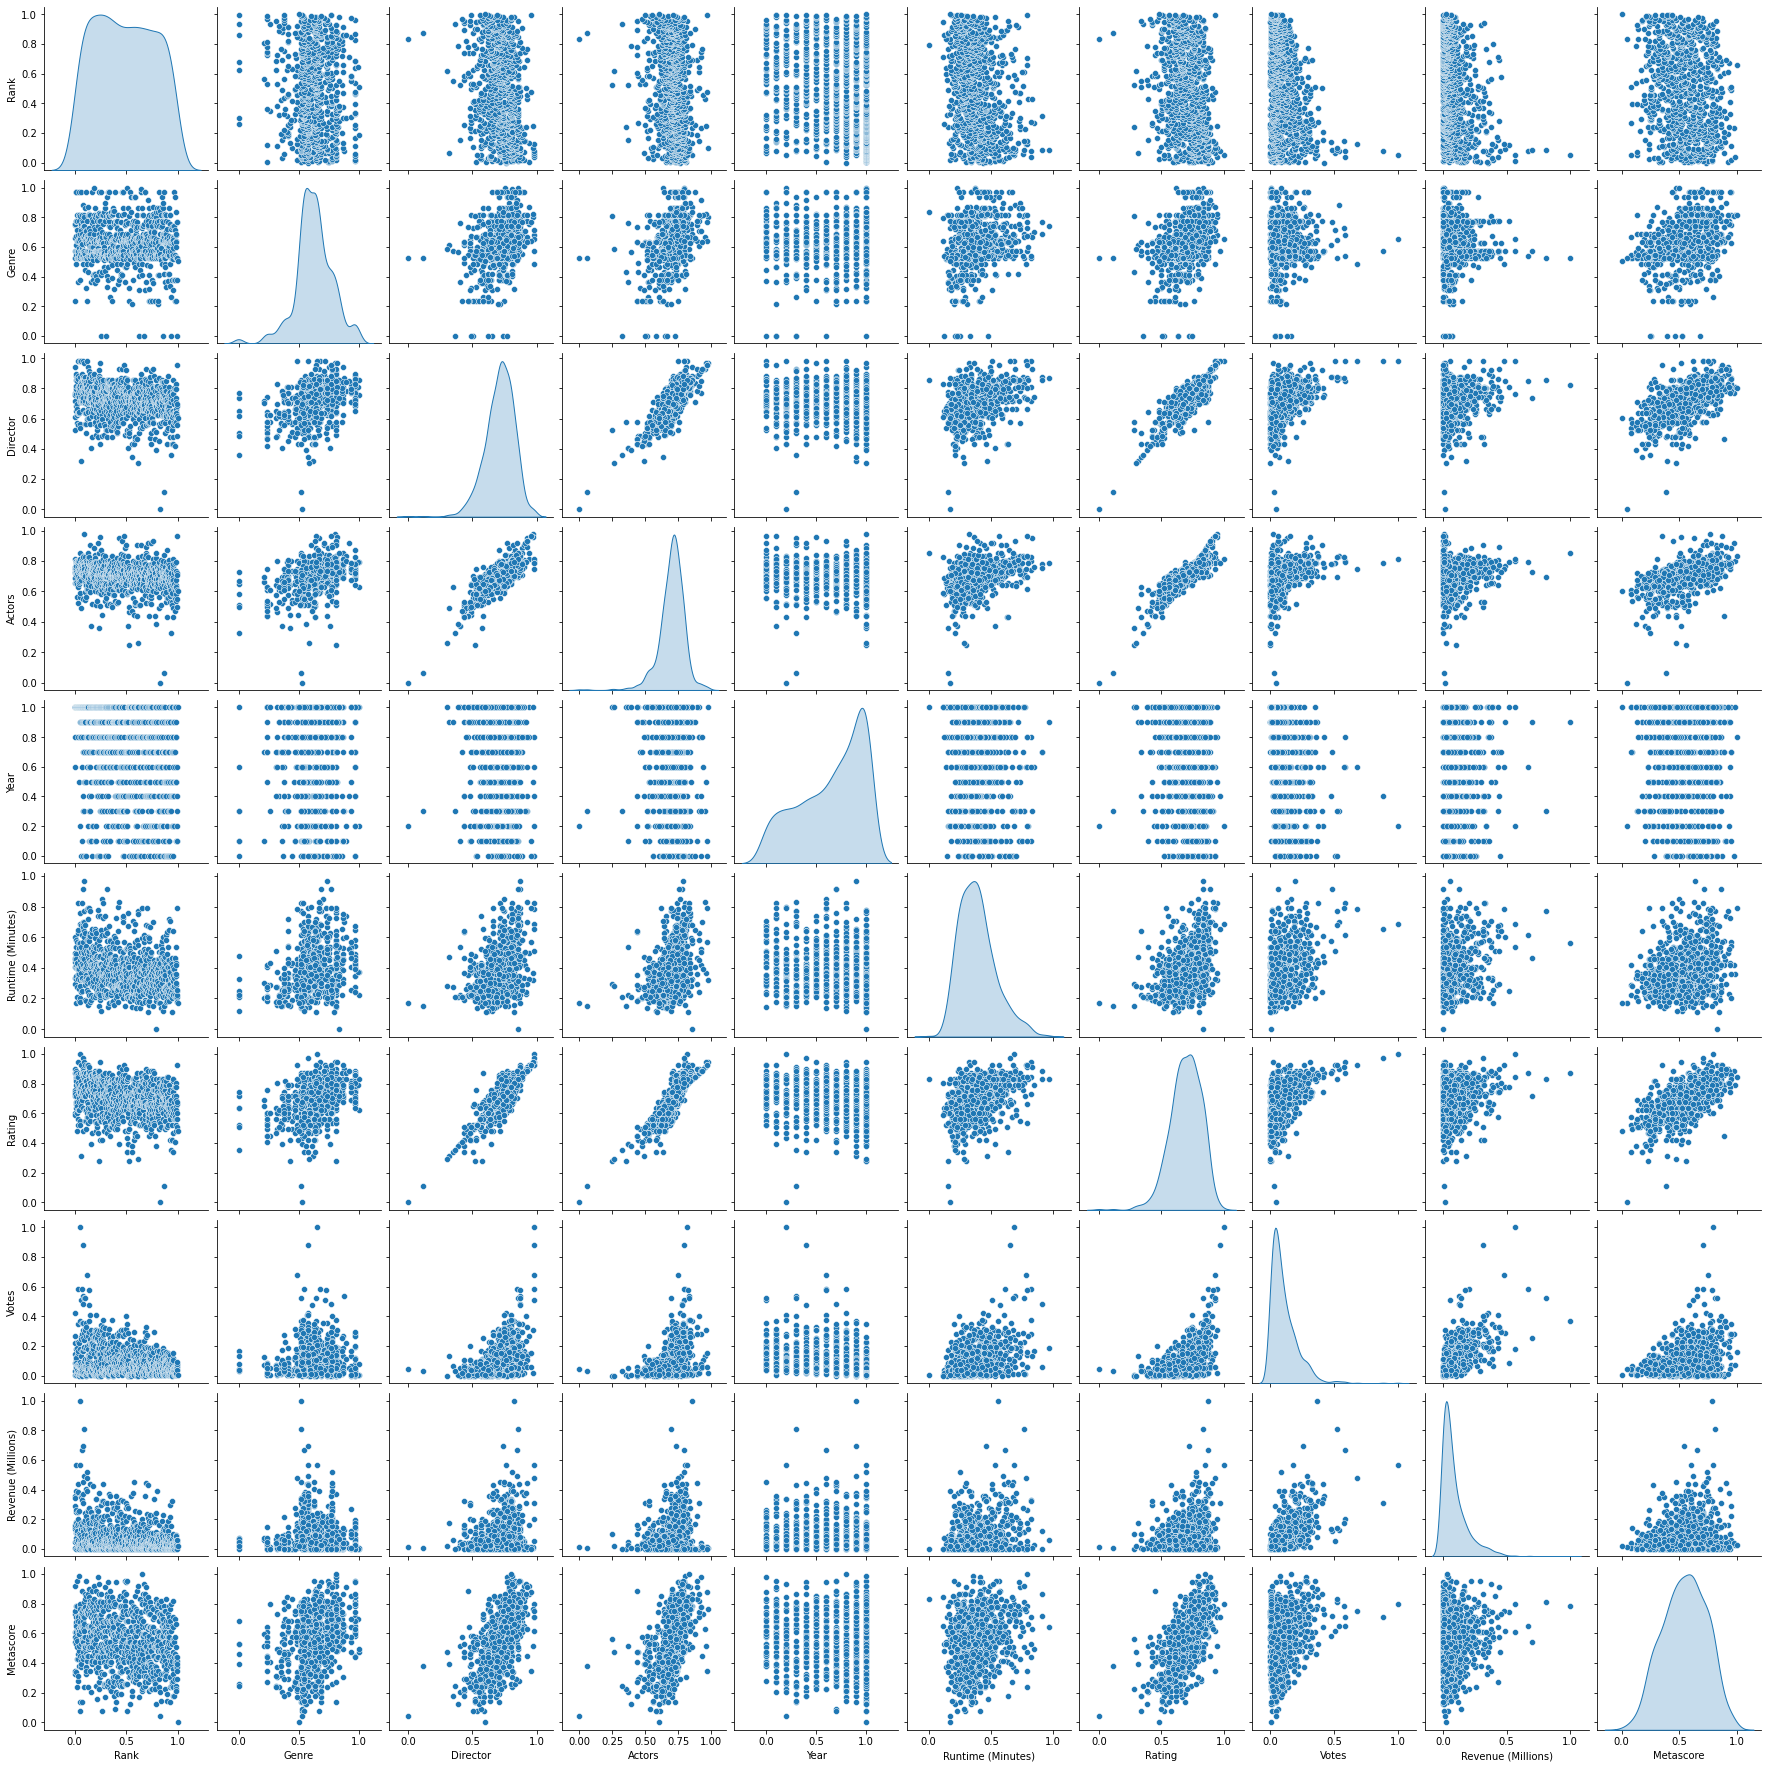

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
Output=['Rating']
Input=list(set(df.columns).difference(set(Output)))
Input=list(set(Input).difference(set(['Rank','Title','Description'])))
sns.pairplot(data=df, diag_kind='kde')


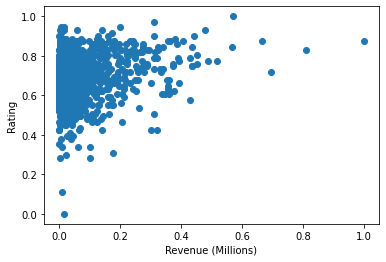

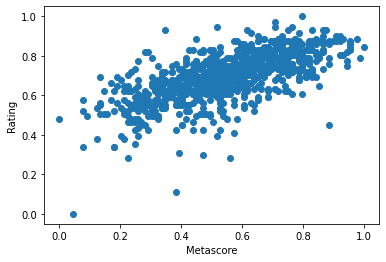

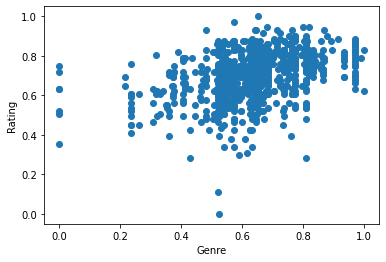

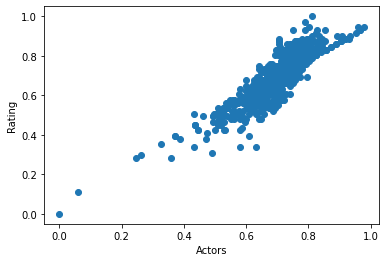

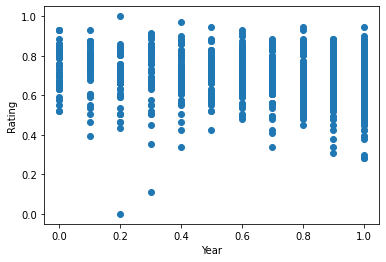

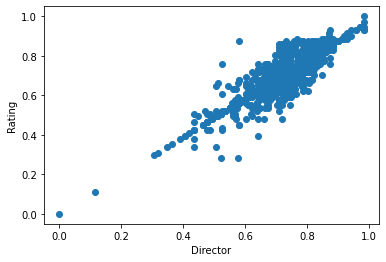

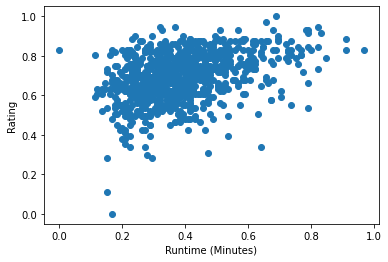

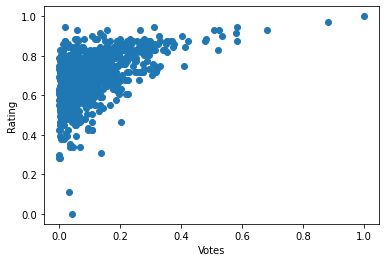

In [ ]:
for i in Input:
  for j in Output:
    plt.scatter(df[i],df[j])
    plt.xlabel(i)
    plt.ylabel(j)
    plt.show()

In [ ]:
import numpy as np
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array(df[Input])
Y = np.array(df[Output])

In [ ]:
np.any(np.isnan(X))

False

In [ ]:
np.all(np.isfinite(X))

True

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

regr = LinearRegression()

regr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
import joblib

In [ ]:
joblib.dump(regr, 'linear_1.sav')

['linear_1.sav']

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

Y_pred=regr.predict(X_test)
print("Accuracy: ", regr.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

Accuracy:  0.8856488026786817
R^2 :  0.8856488026786817
MAE : 0.030534428750470872
RMSE: 0.04012178003770458


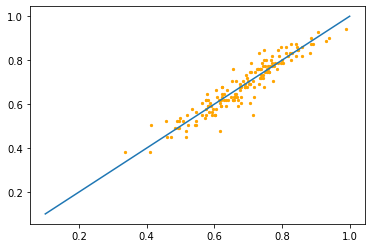

In [ ]:
ax = plt.axes()
ax.scatter(Y_pred,Y_test,s=5,color='Orange')
ax.plot([0.1, 1], [0.1, 1])

In [ ]:
coef=regr.coef_[0]
for i in range(8):
  print(Input[i],': ',coef[i])

Revenue (Millions) :  -0.08297303278895629
Metascore :  0.10685638076428855
Genre :  0.020820504722295328
Actors :  0.5447991357949433
Year :  -0.004900578725880261
Director :  0.3884005195935525
Runtime (Minutes) :  -0.012926261499354913
Votes :  0.2351257830224554


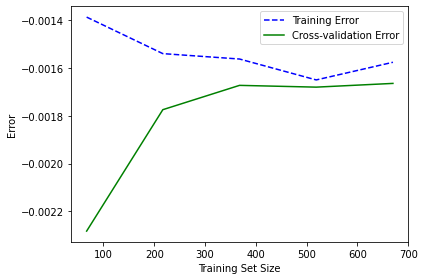

In [ ]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(regr, X, Y, scoring='neg_mean_squared_error')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

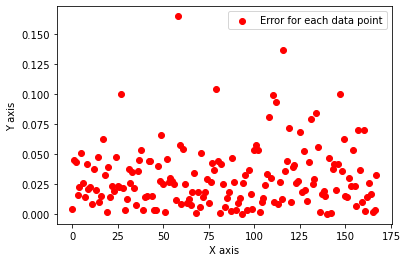

[0.09324497013228705, 0.09949435697719589, 0.09977952777411014, 0.09980812759658031, 0.10446611977611375, 0.13641550843274697, 0.16490109175498235]


In [ ]:

error_diff_val = abs(Y_pred - Y_test)

a = np.array(range(0, X_test.shape[0]))
b = (error_diff_val)
# plt.title("Plotting 1-D array")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.scatter(a, b, color = "red", marker = "o", label = "Error for each data point")
plt.legend()
plt.show()

# we can consider threshold error to be 0.085

error_diff = abs(Y_pred - Y_test) > 0.085
toperrors = []

# print(error_diff)

# print(X_test.shape[0])

cases_error_gt_thresh = []

for i in  range(0, X_test.shape[0]):
  if error_diff[i][0]:
    toperrors.append(error_diff_val[i][0])
    cases_error_gt_thresh.append(X_test[i])

toperrors.sort()

 


print(toperrors)

# print(len(cases_error_gt_mae))

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from numpy import array 

select = SelectKBest(score_func=f_regression, k=5)
z = select.fit_transform(X_train, Y_train) 
 
print("After selecting best 5 features:", z.shape)


After selecting best 5 features: (670, 5)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
filter = select.get_support()
# print(filter)
features = array(df[Input].columns)
 
print("All features:")
print(features)
 
print("Selected best 5:")
print(features[filter])
# print(z) 

All features:
['Revenue (Millions)' 'Metascore' 'Genre' 'Actors' 'Year' 'Director'
 'Runtime (Minutes)' 'Votes']
Selected best 5:
['Metascore' 'Genre' 'Actors' 'Director' 'Votes']


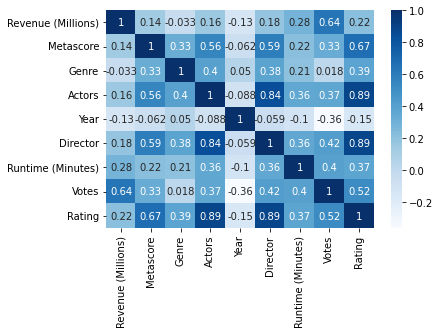

In [ ]:
a = Input
a.append('Rating')
# print(a)
sns.heatmap(df[a].corr(), cmap='Blues', annot=True)
plt.show()
#  We see that ['Director' 'Actors' 'Votes' 'Metascore' 'Genre'] have an average +ve correlation with rating.
Input.remove('Rating')

In [ ]:
Input2 = features[filter]
X = np.array(df[Input2])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

regr = LinearRegression()

regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print("Accuracy: ", regr.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))



Accuracy:  0.8881432305701049
R^2 :  0.8881432305701049
MAE : 0.030019036699825356
RMSE: 0.039681764062774606


In [ ]:
joblib.dump(regr, 'select_k_best.sav')

['select_k_best.sav']

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[Input])
df['cust_type'] = kmeans.predict(df[Input])
Input3 = Input
Input3.append('cust_type')

# print(Input3)

X = np.array(df[Input3])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

regr = LinearRegression()

regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print("Accuracy: ", regr.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

Accuracy:  0.8857908368511451
R^2 :  0.8857908368511451
MAE : 0.030502244550758745
RMSE: 0.04009685491834294


In [ ]:
joblib.dump(regr, 'k_means.sav')

['k_means.sav']

In [ ]:
df.drop(['cust_type'], axis=1, inplace=True)

In [ ]:
Input.remove('cust_type')

In [ ]:
Input_square = [i + "_square" for i in Input]
Input_cube = [i + "_cube" for i in Input]
df[Input_square] = df[Input] * df[Input]
df[Input_cube] = df[Input] * df[Input] * df[Input]



In [ ]:
a = [*Input, *Input_square]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

regr = LinearRegression()

regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print("Accuracy: ", regr.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

Accuracy:  0.8870718349724858
R^2 :  0.8870718349724858
MAE : 0.030606509433604108
RMSE: 0.039871352709747086


In [ ]:
joblib.dump(regr, 'linear_2.sav')

['linear_2.sav']

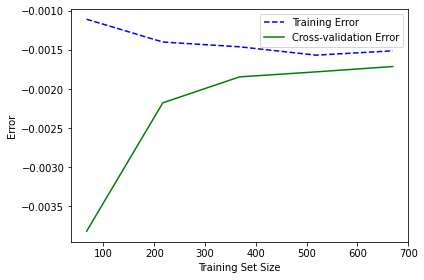

In [ ]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(regr, X, Y, scoring='neg_mean_squared_error')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
a = [*Input, *Input_square, *Input_cube]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=11)

regr = LinearRegression()

regr.fit(X_train, Y_train)
Y_pred=regr.predict(X_test)
print("Accuracy: ", regr.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

Accuracy:  0.8882278921164513
R^2 :  0.8882278921164513
MAE : 0.03048221601201463
RMSE: 0.03966674416076578


In [ ]:
joblib.dump(regr, 'linear_3.sav')

['linear_3.sav']

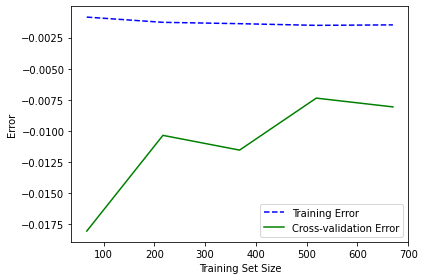

In [ ]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(regr, X, Y, scoring='neg_mean_squared_error')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
# So it's overfitting
# Let's apply Regularisation

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
print("Accuracy: ", clf.score(X_test, Y_test))
print("R^2 : ", r2_score(Y_test, Y_pred))
print("MAE :", mean_absolute_error(Y_test,Y_pred))
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred)))

Accuracy:  0.889480182508143
R^2 :  0.889480182508143
MAE : 0.03008137389811321
RMSE: 0.03944390589790342


In [ ]:
joblib.dump(regr, 'linear_3_with_regularisation.sav')

['linear_3_with_regularisation.sav']

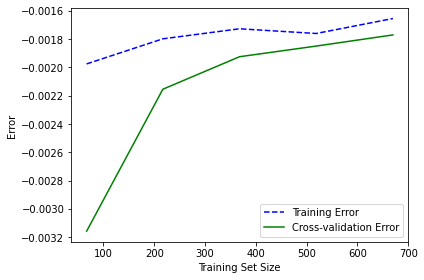

In [ ]:
from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(clf, X, Y, scoring='neg_mean_squared_error')

mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

plt.plot(sizes, mean_training, '--', color="b",  label="Training Error")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation Error")

plt.xlabel("Training Set Size"), plt.ylabel("Error"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**Cross Validation**

> R2 Score and NMSE on 1, 2, 3, 3 + Reg





In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a = [*Input]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores1 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(max(scores1))
print(max(scores2))

0.9235680534488592
-0.0012231546609085481


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a = [*Input, *Input_square]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores1 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

print(max(scores1))
print(max(scores2))

0.9246452321485885
-0.001223613843573868


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a = [*Input, *Input_square, *Input_cube]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores1 = cross_val_score(model, X, Y, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(max(scores1))
print(max(scores2))

0.9253823474493744
-0.001248352708393795


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
a = [*Input, *Input_square, *Input_cube]
X = np.array(df[a])
Y = np.array(df[Output])
np.any(np.isnan(X))
np.any(np.isnan(X))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = Ridge(1.0)
scores1 = cross_val_score(model, X, Y, scoring='r2', n_jobs=-1)
scores2 = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(max(scores1))
print(max(scores2))

0.8931761985811312
-0.0012337398897907211


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
